# Spatial grids of fire danger indexes

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
- Querying the data layer
    - Point query
    - Raster query
- References
  
## Overview

The dead fuel moisture threshold (10–hour, 100–hour, or 1,000–hour), called a time lag, is based upon how long it would take for 2/3 of the dead fuel to respond to atmospheric moisture. The fuel moisture index is a tool that is widely used to understand the fire potential for locations across the country. Fuel moisture is a measure of the amount of water in a fuel (vegetation) available to a fire, and is expressed as a percent of the dry weight of that specific fuel.

- 10-hour fuel: This refers to vegetation with a diameter of 0.25 to 1 inch. Moisture content for this fuel type can be calculated using weather data at the time of observation, including temperature, humidity, and cloud cover. Alternatively, it can be an observed value from a standard set of fuel sticks, which are weighed as part of fire weather observations.
- 100-hour fuel: This includes vegetation with a diameter between 1 and 3 inches. Its moisture content is typically calculated using the average weather conditions over the past 24 hours, such as day length, rain hours, and the daily range of temperature and humidity.
- 1,000-hour fuel: This refers to vegetation with a diameter between 3 and 8 inches. Moisture content for this fuel type is computed from the average weather conditions over the past 7 days, including factors like day length, rain hours, and the daily range of temperature and humidity.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the config below.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib

In [1]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get Authentication token

In [2]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-21 13:05:47 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-21 13:05:47 - paw - INFO - Legacy Environment is False
2025-01-21 13:05:47 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-21 13:05:49 - paw - INFO - Authentication success.
2025-01-21 13:05:49 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers
We shall start by querying the catalog to retrieve the Data Set ID and the Data Layers that form the dataset.

In [3]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("Spatial grids of fire danger indexes")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,299,50039,Fire danger rating,"A Fire Danger Rating level taking into account current and antecedent weather, fuel types, and both live and dead fuel moisture.",13,Raster,,Spatial grids of fire danger indexes,Fire danger indexes for dead fuel that are extracted from individual weather stations and included in a spatial grid.
1,299,50113,10 hour fuel moisture,"0.25-1 inch diameter fuel sticks. Computed from observation time temperature, humidity and cloudiness. Can also be an observed value from fuel sticks weighed as part of the fire weather observation.",13,Raster,,Spatial grids of fire danger indexes,Fire danger indexes for dead fuel that are extracted from individual weather stations and included in a spatial grid.
2,299,50114,100 hour fuel moisture,"1-3 inch diameter fuel sticks. Computed from 24 hour average conditions composed of day length, hours of rain, and daily temperature/humidity ranges.",13,Raster,,Spatial grids of fire danger indexes,Fire danger indexes for dead fuel that are extracted from individual weather stations and included in a spatial grid.
3,299,50115,1000 hour fuel moisture,"3-8 inch diameter fuel sticks. Computed from a 7 day average conditions composed of day length, hours of rain, and daily temperature/humidity ranges.",13,Raster,,Spatial grids of fire danger indexes,Fire danger indexes for dead fuel that are extracted from individual weather stations and included in a spatial grid.


As seen above, the Data Set of ID 299 has four Data Layers. Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

## Querying the data layers

### Point Query
Next, we shall make a point query for locations in different parts of the USA to observe the fuel moisture and fire danger rating.

In [15]:
query_result = query.submit(
    {
        "layers" : [
            {
                "type" : "raster", 
                "id" : "50113"
            },
            {
                "type" : "raster", 
                "id" : "50114"
            },
            {
                "type" : "raster", 
                "id" : "50115"
            },
            {
                "type" : "raster", 
                "id" : "50039"
            }
        ],
        "spatial" : {
            "type" : "point",
            "coordinates" : [
                36.164562, -120.284328,      #California
                43.482376, -121.906849,      #Oregon
                47.806517, -120.884422,      #Washington
                44.028516, -114.321111       #Idaho
            ] 
        },
        "temporal" : {
            "intervals" : [
                {
                    "start" : "2024-01-01T00:00:00Z", 
                    "end" : "2024-01-02T00:00:00Z"
                }
            ]
        }
    } , client=EI_client_v3)

point_df = query_result.point_data_as_dataframe()
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-17 13:35:51 - paw - INFO - TASK: submit STARTING.
2025-01-17 13:35:53 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,datetime
0,50039,Fire danger rating,Spatial grids of fire danger indexes,-120.284328,36.164562,0.20000000298023224,2024-01-01T00:00:00Z
1,50039,Fire danger rating,Spatial grids of fire danger indexes,-121.906849,43.482376,0.20000000298023224,2024-01-01T00:00:00Z
2,50039,Fire danger rating,Spatial grids of fire danger indexes,-114.321111,44.028516,0.2724287807941437,2024-01-01T00:00:00Z
3,50039,Fire danger rating,Spatial grids of fire danger indexes,-120.884422,47.806517,0.20000000298023224,2024-01-01T00:00:00Z
4,50039,Fire danger rating,Spatial grids of fire danger indexes,-120.284328,36.164562,0.20000000298023224,2024-01-02T00:00:00Z
5,50039,Fire danger rating,Spatial grids of fire danger indexes,-121.906849,43.482376,0.20000000298023224,2024-01-02T00:00:00Z
6,50039,Fire danger rating,Spatial grids of fire danger indexes,-114.321111,44.028516,0.2724287807941437,2024-01-02T00:00:00Z
7,50039,Fire danger rating,Spatial grids of fire danger indexes,-120.884422,47.806517,0.20000000298023224,2024-01-02T00:00:00Z
8,50113,10 hour fuel moisture,Spatial grids of fire danger indexes,-120.284328,36.164562,28.0,2024-01-01T00:00:00Z
9,50113,10 hour fuel moisture,Spatial grids of fire danger indexes,-121.906849,43.482376,24.0,2024-01-01T00:00:00Z


We see above, fuel moisture value and fire danger rating for various locations we queried for. For instance, the location at coordinates (36.164562, -120.284328) in California has fire danger rating of 0.20000000298023224 as on 01/01/2024.
Note: The comments within the query JSON, intended for descriptive purposes, may cause compatibility issues in other programming languages and should be removed when using the data in those contexts.

### Raster Query
Next, we shall make a raster query for a square area in the USA and understand the fire risk in that region based on the moisture levels in the vegetation.

In [74]:
usfs_wfas_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Fire danger indexes for a region in the USA",
        "spatial": {
            "type": "square",
            "coordinates": [
                34.744,-119.036,
                46.343,-104.599
            ]
        },
        "temporal": {
            "intervals": [
              {
                "start": "2024-03-01T00:00:00Z",
                "end": "2024-03-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "type" : "raster", 
                "id" : "50113",
                "output": True
            },
            {
                "type" : "raster", 
                "id" : "50114",
                "output": True
            },
            {
                "type" : "raster", 
                "id" : "50115",
                "output": True
            },
            {
                "type" : "raster", 
                "id" : "50039",
                "output": True
            }
        ]
    }, client=EI_client_v3)

2025-01-20 12:39:27 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-20 12:39:29 - paw - INFO - The query was successfully submitted with the id: 1737331200_25769403.
2025-01-20 12:39:30 - paw - INFO - The query 1737331200_25769403 has the status Queued.
2025-01-20 12:40:01 - paw - INFO - The query 1737331200_25769403 has the status Running.
2025-01-20 12:40:32 - paw - INFO - The query 1737331200_25769403 has the status Succeeded.
2025-01-20 12:40:32 - paw - INFO - The query 1737331200_25769403 was successful after checking the status.
2025-01-20 12:41:03 - paw - INFO - The query 1737331200_25769403 has the status Succeeded.
2025-01-20 12:41:03 - paw - INFO - The query 1737331200_25769403 was successful after checking the status.
2025-01-20 12:41:03 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence-internal/geospatial_analytics/v3_apis/samples/industry_use_cases/datasets/usfs_wfas/download/.
2

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now let us display the resultant tiffs using the following utility function.

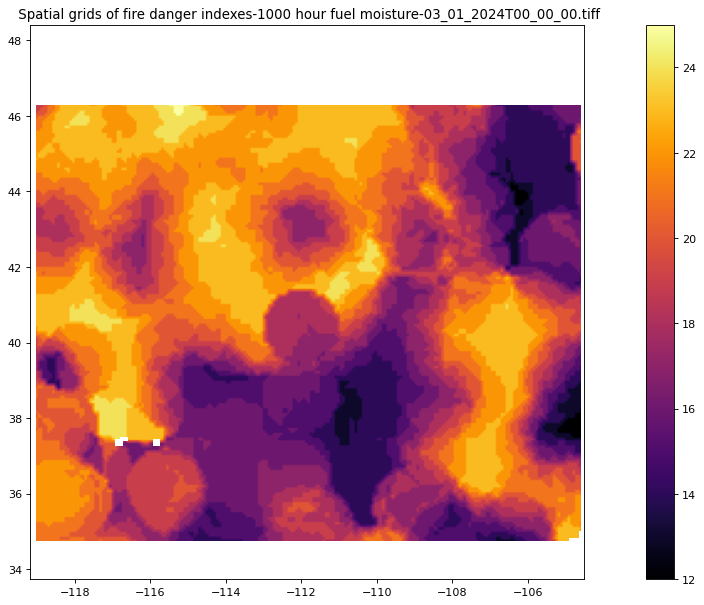

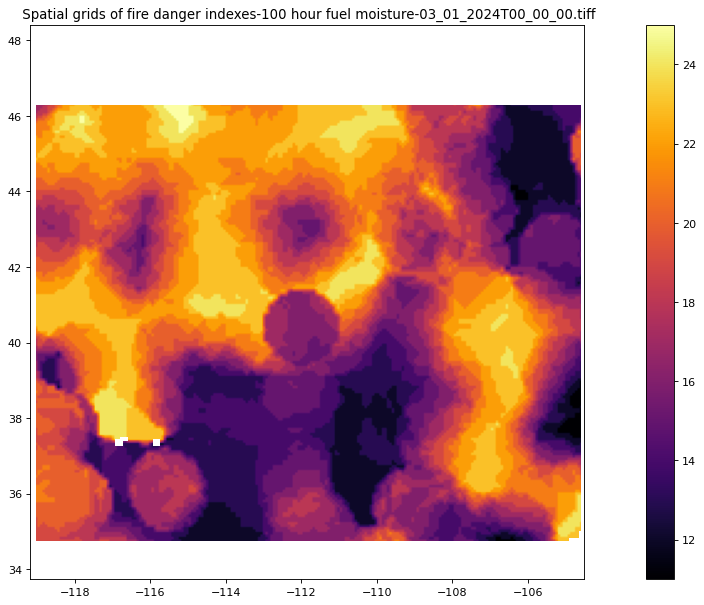

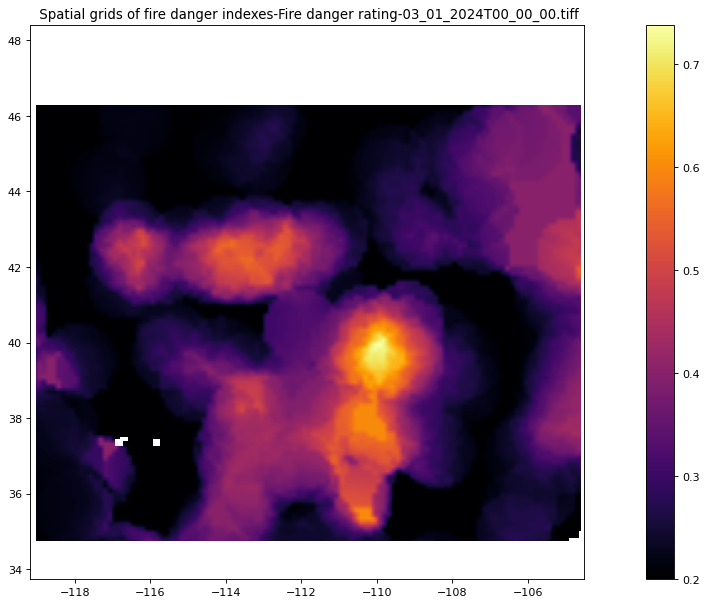

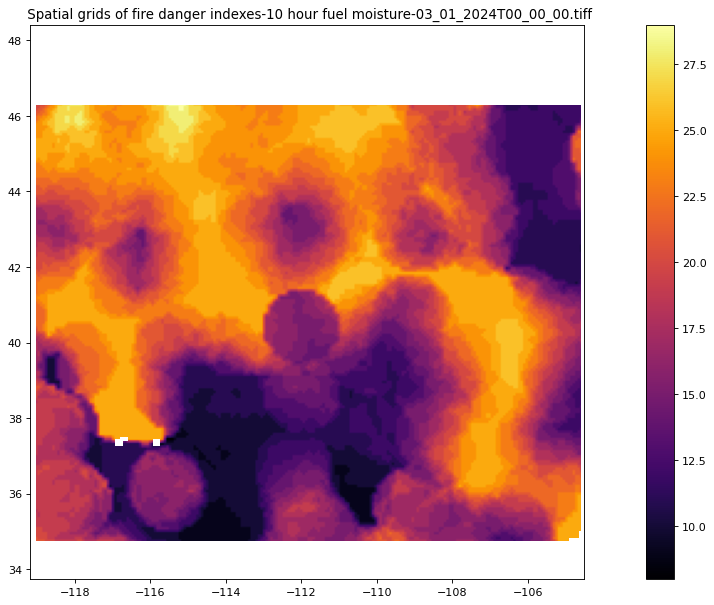

In [78]:
# Function to display the resulting Tiff(s).
usfs_wfas_Result_file_list = usfs_wfas_Result.list_files()
output_image_array = []
for file in usfs_wfas_Result_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude"]]  
        arrayusfs = np.array(PILImage.open(file))
        mask = (arrayusfs == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(arrayusfs, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'inferno', 
                   vmin=pixelStatistics["pixelMin"], 
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file)) 
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        plt.savefig(output_image_path, bbox_inches='tight')
        output_image_array.append(output_image_path)
        plt.close()

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))

The images above represent data for moisture in fuels of various diameters and fire danger rating. The color gradient visually represents the magnitude and variation of moisture content and fire risk, helping to highlight areas with differing levels of fire danger.

### References
- https://www.wfas.net/index.php/dead-fuel-moisture-moisture--drought-38